In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from malnis import show
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import scipy.sparse as sp
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, SparsePCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score, average_precision_score, PrecisionRecallDisplay
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

/home/jarobyte/anaconda3/envs/malnis/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(


In [2]:
pwd

'/home/jarobyte/phd/projects/malnis_dataset/notebooks'

In [3]:
data = pd.read_pickle("../data/labels.pkl")#.head(50)
show(data, 20)

(391, 8)


,query,document,summary,r1,r2,rl,sentences,relevance
36,"For many types of machine learning algorithms,...","field in computer science, and health informat...",[While the techniques for neural networks are ...,0.594595,0.485714,0.594595,"[field in computer science, and health informa...","[False, False, False, False, False, False, Fal..."
38,We consider the problem of learning good traje...,"field in computer science, and health informat...",[[71] considered the problem of learning good ...,0.646766,0.478571,0.636816,"[field in computer science, and health informa...","[False, False, False, False, False, False, Fal..."
136,We study in this work the importance of depth ...,Deep Learning Based Text Classification: A Com...,[[57] show that deep models indeed outperform ...,0.533333,0.403101,0.533333,[Deep Learning Based Text Classification: A Co...,"[False, False, False, False, False, False, Fal..."
5,We investigate a lattice-structured LSTM model...,1041-4347 (c) 2020 IEEE. Personal use is permi...,[Zhang and Yang [149] proposed a lattice-struc...,0.478261,0.393162,0.478261,"[1041-4347 (c) 2020 IEEE., Personal use is per...","[False, False, False, False, False, False, Fal..."
316,"HDBSCAN*, a state-of-the-art density-based hie...",PVLDB Reference Format: Antonio Cavalcante Ara...,"[In [6], the authors proposed RNG-HDBSCAN*, a ...",0.539062,0.350365,0.507812,[PVLDB Reference Format: Antonio Cavalcante Ar...,"[False, False, False, False, False, False, Fal..."
112,This work investigates continual learning of t...,Fully automatic deep learning has become the s...,[Baweja et al. (2018) investigate continual le...,0.480769,0.317690,0.442308,[Fully automatic deep learning has become the ...,"[False, False, False, False, False, False, Fal..."
133,Word embeddings are effective intermediate rep...,Deep Learning Based Text Classification: A Com...,[[84] view TC as a label-word matching problem...,0.508671,0.299145,0.485549,[Deep Learning Based Text Classification: A Co...,"[False, False, False, False, False, False, Fal..."
257,Query relevance ranking and sentence saliency ...,Keywords: Query-focused summarization · Extrac...,[There exist approaches utilizing attention me...,0.500000,0.293333,0.490566,[Keywords: Query-focused summarization · Extra...,"[False, False, True, False, False, False, Fals..."
52,The key idea behind active learning is that a ...,I. INTRODUCTION Deep Neural Networks (DNNs) tr...,[The key idea behind active learning is that a...,0.368664,0.282828,0.368664,"[I., INTRODUCTION Deep Neural Networks (DNNs) ...","[False, False, False, False, False, False, Fal..."
315,When AI systems interact with humans in the lo...,22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 2...,[• Approaches: Past work on explanations prima...,0.330827,0.278075,0.330827,[22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 ...,"[False, False, False, False, False, False, Fal..."


<AxesSubplot:ylabel='Frequency'>

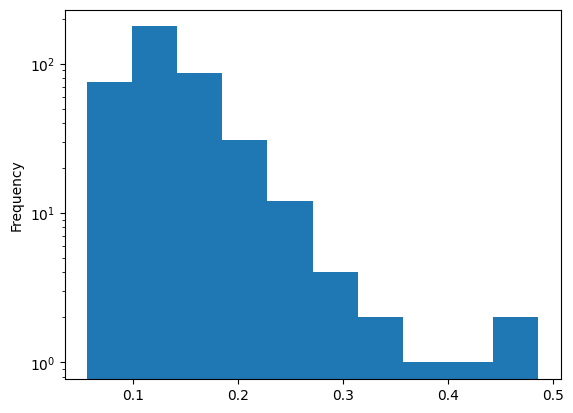

In [4]:
data.r2.plot.hist(log = True)

In [5]:
data["query"][36]

"For many types of machine learning algorithms, one can compute the statistically `optimal' way to select training data. In this paper, we review how optimal data selection techniques have been used with feedforward neural networks. We then show how the same principles may be used to select data for two alternative, statistically-based learning architectures: mixtures of Gaussians and locally weighted regression. While the techniques for neural networks are computationally expensive and approximate, the techniques for mixtures of Gaussians and locally weighted regression are both efficient and accurate. Empirically, we observe that the optimality criterion sharply decreases the number of training examples the learner needs in order to achieve good performance."

In [6]:
[s for s, l in zip(data.sentences[36], data.relevance[36]) if l == True]

['For many types of ML-algorithms, one can compute the statistically optimal way to select training data.',
 'While the techniques for neural networks are computationally expensive and approximate, the techniques for mixtures of Gaussians and locally weighted regression are both efficient and accurate [74].']

In [7]:
sum(data.relevance[36])

2

In [8]:
len(data.relevance[36])

256

In [9]:
model = SentenceTransformer(
    "sbert"
#     'all-MiniLM-L6-v2', 
#     cache_folder = "../assets"
#     "../cache/huggingface/transformers/"
#     cache_folder = "../cache/huggingface/transformers"
)
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [10]:
query_embeddings = model.encode(data["query"])
query_embeddings.shape

(391, 384)

In [15]:
dims = query_embeddings.shape[1]
sentence_embeddings = [
    model.encode(l)#.toarray() 
    for l in tqdm(data.sentences)
]
all([l.shape[1] == dims for l in sentence_embeddings])

  0%|          | 0/391 [00:00<?, ?it/s]

True

In [16]:
# query_embeddings.shape[0] == len(sentence_embeddings)

In [17]:
sum([len(l) for l in tqdm(data.sentences)])

  0%|          | 0/391 [00:00<?, ?it/s]

222254

In [33]:
train = [
#     ((sp.csr_matrix(np.ones([l.shape[0],1])) * q) - l).power(2)
    (q - l)
#     np.concatenate([np.tile(q, (l.shape[0], 1)), l], axis = 1)
    for q, l in zip(tqdm(query_embeddings), sentence_embeddings)
]
len(train)

  0%|          | 0/391 [00:00<?, ?it/s]

391

In [34]:
X = np.concatenate(train)#.toarray().T#.squeeze()
X.shape

(222254, 384)

In [35]:
np.save("X_sbert_diff.npy", X)

In [36]:
X = np.load("X_sbert_diff.npy")
X.shape

(222254, 384)

In [37]:
Y = np.array([y for l in tqdm(data.relevance) for y in l])
Y.shape

  0%|          | 0/391 [00:00<?, ?it/s]

(222254,)

In [38]:
Y.sum()

3836

In [39]:
Y.mean()

0.01725953188694017

In [40]:
# %%time
# model = LogisticRegression(
#     C = 10**-2
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [41]:
# %%time
# model = LogisticRegression(
#     C = 10**-2
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [42]:
# %%time
# model = SVC(
# #     C = 10**-2
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [43]:
# %%time
# model = MLPClassifier(
# #     C = 10**-2
#     verbose = True,
# #     early_stopping = True
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (166690, 384)
X_test (55564, 384)


In [45]:
Y_train.sum(), Y_test.sum()

(2847, 989)

In [53]:
%%time

model = MLPClassifier(
    hidden_layer_sizes = (100, 100),
#     C = 10**-2
    verbose = True,
#     early_stopping = True
)
model.fit(X_train, Y_train)

predictions = model.predict_proba(X_test)

# predictions.sum()
predictions.shape

Iteration 1, loss = 0.09258682
Iteration 2, loss = 0.07970116
Iteration 3, loss = 0.07750452
Iteration 4, loss = 0.07509019
Iteration 5, loss = 0.07247092
Iteration 6, loss = 0.06904813
Iteration 7, loss = 0.06541980
Iteration 8, loss = 0.06182775
Iteration 9, loss = 0.05764693
Iteration 10, loss = 0.05360744
Iteration 11, loss = 0.04891857
Iteration 12, loss = 0.04494552
Iteration 13, loss = 0.04105717
Iteration 14, loss = 0.03662976
Iteration 15, loss = 0.03286016
Iteration 16, loss = 0.02907220
Iteration 17, loss = 0.02625643
Iteration 18, loss = 0.02304561
Iteration 19, loss = 0.02066349
Iteration 20, loss = 0.01845103
Iteration 21, loss = 0.01718862
Iteration 22, loss = 0.01565717
Iteration 23, loss = 0.01416387
Iteration 24, loss = 0.01307604
Iteration 25, loss = 0.01222153
Iteration 26, loss = 0.01192402
Iteration 27, loss = 0.01097281
Iteration 28, loss = 0.01026969
Iteration 29, loss = 0.00969572
Iteration 30, loss = 0.01035477
Iteration 31, loss = 0.00846614
Iteration 32, los

(55564, 2)

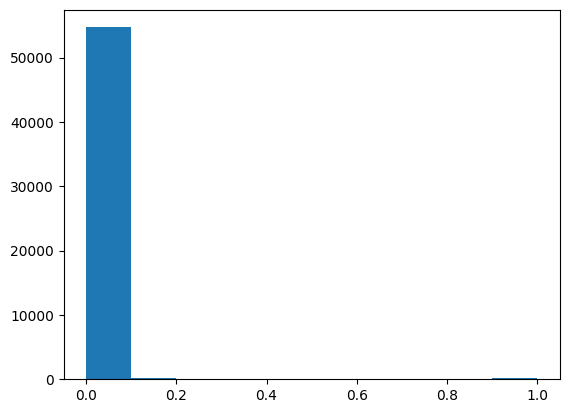

In [54]:
plt.hist(predictions[:, 1])
# plt.xlim(-0.1, 1.1)
plt.show()

In [55]:
roc_auc_score(Y_test, predictions[:, 1])

0.6784564798213237

In [56]:
average_precision_score(Y_test, predictions[:, 1])

0.049979172147317924

In [57]:
f1_score(Y_test, predictions[:, 1] > 0.5)

0.0793544048419637

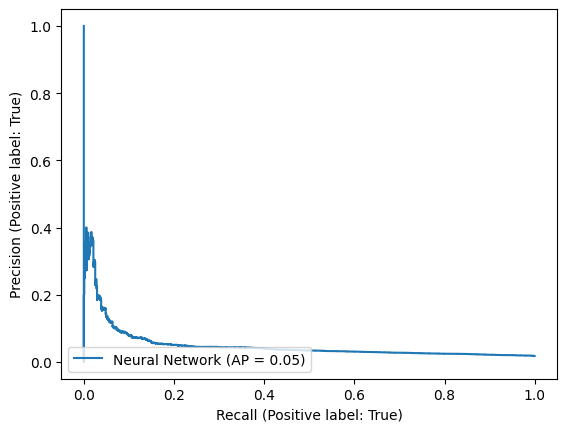

In [58]:
display = PrecisionRecallDisplay.from_estimator(
    model, X_test, Y_test, name="Neural Network"
)